In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/HousePrices (1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [5]:
for i in df.columns:
  print(i,":",df[i].isna().sum())

Id : 0
Dwell_Type : 0
Zone_Class : 0
LotFrontage : 320
LotArea : 0
Road_Type : 0
Alley : 1944
Property_Shape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
Dwelling_Type : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 14
MasVnrArea : 14
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 59
BsmtCond : 59
BsmtExposure : 61
BsmtFinType1 : 59
BsmtFinSF1 : 0
BsmtFinType2 : 60
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 988
GarageType : 113
GarageYrBlt : 113
GarageFinish : 113
GarageCars : 0
GarageArea : 0
GarageQual : 113
GarageCond : 113
Pave

In [6]:
df.shape

(2073, 81)

In [7]:
df.drop("PoolQC",axis=1,inplace=True)
df.drop("MiscFeature",axis=1,inplace=True)
df.drop("Fence",axis=1,inplace=True)
df.drop("Alley",axis=1,inplace=True)
df.drop("Id",axis=1,inplace=True)


In [8]:
df.shape

(2073, 76)

In [9]:
for i in df.columns:
  if df[i].isna().sum()!=0:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
      df[i]=df[i].fillna(df[i].mean())
    elif df[i].dtype=='O':
      df[i]=df[i].fillna(df[i].mode()[0])

In [10]:
df.isna().sum().sort_values(ascending=False)

Dwell_Type             0
HalfBath               0
FireplaceQu            0
Fireplaces             0
Functional             0
                      ..
MasVnrArea             0
MasVnrType             0
Exterior2nd            0
Exterior1st            0
Property_Sale_Price    0
Length: 76, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   int64  
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          2073 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Property_Shape       2073 non-null   object 
 6   LandContour          2073 non-null   object 
 7   Utilities            2073 non-null   object 
 8   LotConfig            2073 non-null   object 
 9   LandSlope            2073 non-null   object 
 10  Neighborhood         2073 non-null   object 
 11  Condition1           2073 non-null   object 
 12  Condition2           2073 non-null   object 
 13  Dwelling_Type        2073 non-null   object 
 14  HouseStyle           2073 non-null   object 
 15  OverallQual          2073 non-null   i

In [12]:
data=pd.get_dummies(df)

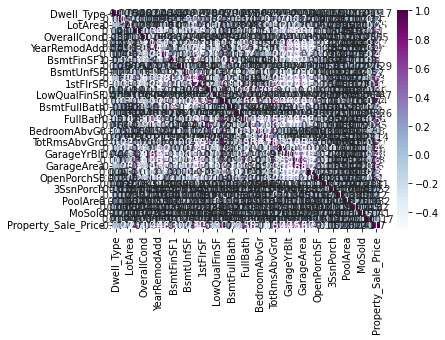

In [13]:
sns.heatmap(df.corr(),cmap="BuPu",annot=True)

In [14]:
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [15]:
for x in df.columns:
      print(x ,':', len(df[x].unique()))

Dwell_Type : 18
Zone_Class : 5
LotFrontage : 111
LotArea : 1367
Road_Type : 2
Property_Shape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
Dwelling_Type : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 117
YearRemodAdd : 72
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
MasVnrArea : 343
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 103
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDrive

In [16]:
df.corr()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.075289,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004831,-0.034072,-0.025699,...,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,-0.075289,1.000000,0.240528,0.101230,-0.010357,0.088630,0.094559,0.121076,0.129897,0.056490,...,0.073800,0.097186,-0.002113,0.037639,0.019810,0.111869,-0.002122,0.023024,0.023630,0.268354
LotArea,-0.033609,0.240528,1.000000,0.078232,0.014209,-0.010551,0.017766,0.063975,0.164989,0.075875,...,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.046278,0.101230,0.078232,1.000000,-0.010092,0.335326,0.379579,0.282833,0.163501,-0.058146,...,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.033023,-0.010357,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.082965,-0.035849,0.027023,...,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,0.027194,0.088630,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.262509,0.207941,-0.027220,...,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.042864,0.094559,0.017766,0.379579,0.084102,0.536129,1.000000,0.166082,0.101401,-0.073927,...,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.004831,0.121076,0.063975,0.282833,-0.082965,0.262509,0.166082,1.000000,0.237311,-0.079713,...,0.123055,0.140592,-0.097400,0.029772,0.063592,0.002936,-0.035351,-0.017675,0.019987,0.480394
BsmtFinSF1,-0.034072,0.129897,0.164989,0.163501,-0.035849,0.207941,0.101401,0.237311,1.000000,-0.060739,...,0.207229,0.107593,-0.089326,0.045092,0.046826,0.099504,-0.001520,-0.019242,0.030208,0.373276
BsmtFinSF2,-0.025699,0.056490,0.075875,-0.058146,0.027023,-0.027220,-0.073927,-0.079713,-0.060739,1.000000,...,0.073748,-0.001699,0.058107,-0.030341,0.099569,0.027055,-0.002205,-0.016562,0.025510,-0.029042


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()
scaler=st.fit_transform(data)
data=pd.DataFrame(scaler,columns=data.columns)

In [19]:
data

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.003479,-0.274256,-0.246138,0.505371,-0.614038,1.110504,0.801974,0.527249,0.598403,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
1,-0.253657,0.308732,-0.121324,-0.153933,1.592029,0.216918,-0.519756,-0.570669,1.205623,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
2,-0.003479,-0.157659,0.057756,0.505371,-0.614038,1.044312,0.753021,0.336794,0.107270,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
3,0.059066,-0.468586,-0.126751,0.505371,-0.614038,-1.801923,-0.813474,-0.570669,-0.495486,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,3.517697,-0.049171,-0.096178,-0.108227,-2.117576,-0.303648
4,-0.003479,0.464196,0.384441,1.164676,-0.614038,1.011217,0.655115,1.389898,0.484550,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,-0.003479,0.000000,-0.213035,1.164676,-1.349394,-1.106912,0.606162,1.098614,0.745744,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
2069,0.184155,-0.351988,-0.326344,-0.153933,2.327385,-1.106912,-0.470803,-0.570669,2.237005,-0.297252,...,-0.049171,-0.299842,20.337158,-2.551641,3.517697,-0.049171,-0.096178,-0.108227,-2.117576,-0.303648
2070,0.184155,9.364490,1.550089,-1.472542,0.121318,0.448589,0.459303,-0.570669,-0.977690,-0.297252,...,-0.049171,-0.299842,-0.049171,0.391905,-0.284277,-0.049171,-0.096178,-0.108227,0.472238,-0.303648
2071,-0.253657,-0.779513,0.396922,1.823981,0.121318,-0.378805,-1.400910,2.459807,-0.729890,1.840668,...,-0.049171,-0.299842,-0.049171,-2.551641,3.517697,-0.049171,-0.096178,-0.108227,-2.117576,-0.303648


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
principalComponents = pca.fit_transform(data)

In [21]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
X = sm.add_constant(principalComponents)
y=df["Property_Sale_Price"]
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.196e+30
Date:                 Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                         03:24:56   Log-Likelihood:                 43338.
No. Observations:                 2073   AIC:                        -8.621e+04
Df Residuals:                     1838   BIC:                        -8.488e+04
Df Model:                          234                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.81e+05    4.7e-12   3.85e+1

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=0.3,random_state=123)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1451, 250), (622, 250), (1451,), (622,))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999987955528618